In [3]:
import pandas as pd

We have 640 alumni to start with

In [4]:
df = pd.read_csv('result_preprocessing_final.csv', index_col=False)


In [15]:
df

,name,experience_type,school,degree,time,position,company,description,location
0,Carl Malmstrom,school,loyola university chicago school of law,j.d.,2004 - 2007,NaN,NaN,NaN,NaN
1,Carl Malmstrom,work,NaN,NaN,full-timefull-time,wolf haldenstein adler freeman & herz llp,14 yrs 7 mos,wolf haldenstein adler freeman & herz llpwolf ...,NaN
2,Carl Malmstrom,work,NaN,NaN,2 yrs 2 mos,law clerk,"city of chicago, department of law","city of chicago, department of lawcity of chic...",NaN
3,Carl Malmstrom,work,NaN,NaN,7 mos,intern,christine cegelis for congress,christine cegelis for congresschristine cegeli...,NaN
4,Carl Malmstrom,work,NaN,NaN,4 mos,intern,office of cook county commissioner larry suffr...,office of cook county commissioner larry suffr...,NaN
...,...,...,...,...,...,...,...,...,...
4250,Rivka Baker Keusch,work,NaN,NaN,7 mos,director of operations,new york state senator jessica ramos,•\tdeveloped tracking and reporting procedures...,NaN
4251,Rivka Baker Keusch,work,NaN,NaN,1 yr,campaign manager,jessica ramos for state senate,•\toutperformed democratic gubernatorial ticke...,NaN
4252,Rivka Baker Keusch,work,NaN,NaN,1 yr 9 mos,movement relaunch consultant,ifnotnow,"co-owned overall training, content, & facilita...",NaN
4253,Rivka Baker Keusch,work,NaN,NaN,sep 2021 - nov 2021,test & trace corps queens borough outreach dir...,NaN,the nyc test & trace corps announced today tha...,NaN


In [33]:
count_phd = 0
field = []
for index,row in df.iterrows():
    if row['experience_type'] == 'school':
        if(type(row['degree']) == str and 'doctor of philosophy' in row['degree']):
            field.append(row['degree'])
            count_phd = count_phd + 1

In [34]:
count_phd

126

In [52]:
count_psyche = 0
count_poli = 0
count_soci = 0
count_anth = 0
count_hist = 0
count_econ = 0
count_pub = 0
count_busn = 0
count_stem = 0
count_other = 0
for i, f in enumerate(field):
    if 'polit' in f or 'gov' in f:
        count_poli = count_poli + 1
        field[i] = 'Political science'
    if 'psych' in f:
        count_psyche = count_psyche + 1
        field[i] = 'Psychology'
    if 'soci' in f or 'sozial' in f:
        count_soci = count_soci + 1
        field[i] = 'Sociology'
    if 'anth' in f:
        count_anth = count_anth + 1
        field[i] = 'Anthropology'
    if 'hist' in f:
        count_hist = count_hist + 1
        field[i] = 'History'
    if 'econ' in f:
        count_econ = count_econ + 1
        field[i] = 'Economics'
    if 'pub' in f or 'policy' in f or 'community' in f or 'criminal' in f:
        count_pub = count_pub + 1
        field[i] = 'Public Policy'
    if 'market' in f or 'organiz' in f or 'manage' in f:
        count_busn = count_busn + 1
        field[i] = 'Business-related'
    if 'cognitive'in f or 'behavio' in f or 'chem' in f or 'physic' in f or 'computer' in f or 'data' in f or 'medic' in f or 'bio' in f or 'math' in f or 'neuro' in f:
        count_stem = count_stem + 1
        field[i] = 'STEM'

In [53]:
for i, f in enumerate(field):
    if 'doctor of philosophy' in f:
        field[i] = 'others'

In [57]:
field = [field]

In [61]:
with open('field.csv','w') as result_file:
    wr = csv.writer(result_file, dialect='excel')
    for f in field:
        wr.writerows([f])

In [65]:
pd.read_csv('field.csv', header=None).T.to_csv('field.csv')

In [105]:
count_phd = 0
schools = []
for index,row in df.iterrows():
    if row['experience_type'] == 'school':
        if(type(row['degree']) == str and 'doctor of philosophy' in row['degree']):
            schools.append(row['school'])

In [106]:
for i, school in enumerate(schools):
    if 'university of chicago' in school:
        schools[i] = 'university of chicago'
    if 'northwestern university' in school:
        schools[i] = 'northwestern university'
    if 'harvard' in school:
        schools[i] = 'harvard university'
    if 'yale' in school:
        schools[i] = 'yale university'

In [107]:
schools = [schools]
with open('schools.csv','w') as result_file:
    wr = csv.writer(result_file, dialect='excel')
    for f in schools:
        wr.writerows([f])
pd.read_csv('schools.csv', header=None).T.to_csv('schools.csv')

In [70]:
count_mba = 0
for index,row in df.iterrows():
    if row['experience_type'] == 'school':
        if(type(row['degree']) == str and 'mba' in row['degree']):
            count_mba = count_mba + 1

In [71]:
count_mba

43

In [101]:
schools = []
for index,row in df.iterrows():
    if row['experience_type'] == 'school':
        if(type(row['degree']) == str and 'mba' in row['degree']):
            schools.append(row['school'])

In [102]:
for i, school in enumerate(schools):
    if 'university of chicago' in school:
        schools[i] = 'university of chicago'
    else:
        schools[i] = 'others'

In [104]:
schools = [schools]
with open('school.csv','w') as result_file:
    wr = csv.writer(result_file, dialect='excel')
    for f in schools:
        wr.writerows([f])
pd.read_csv('school.csv', header=None).T.to_csv('school.csv')

# Education Analysis

## PhD Placement Results

Around 1/5 of the alumni will go on to a phd

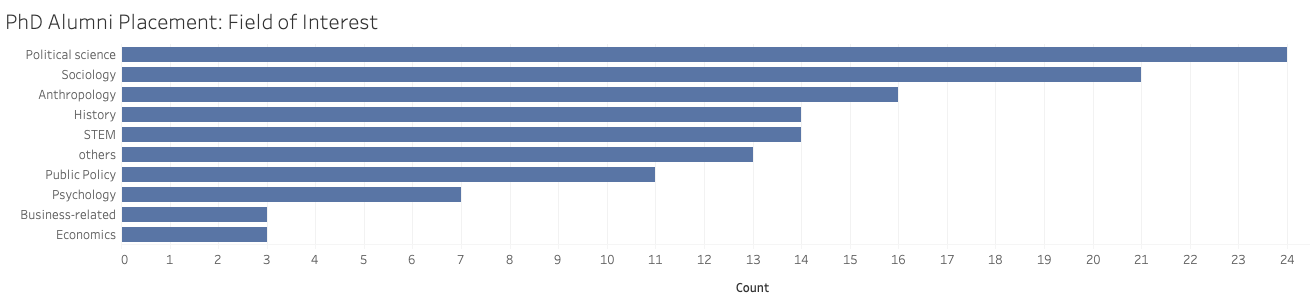

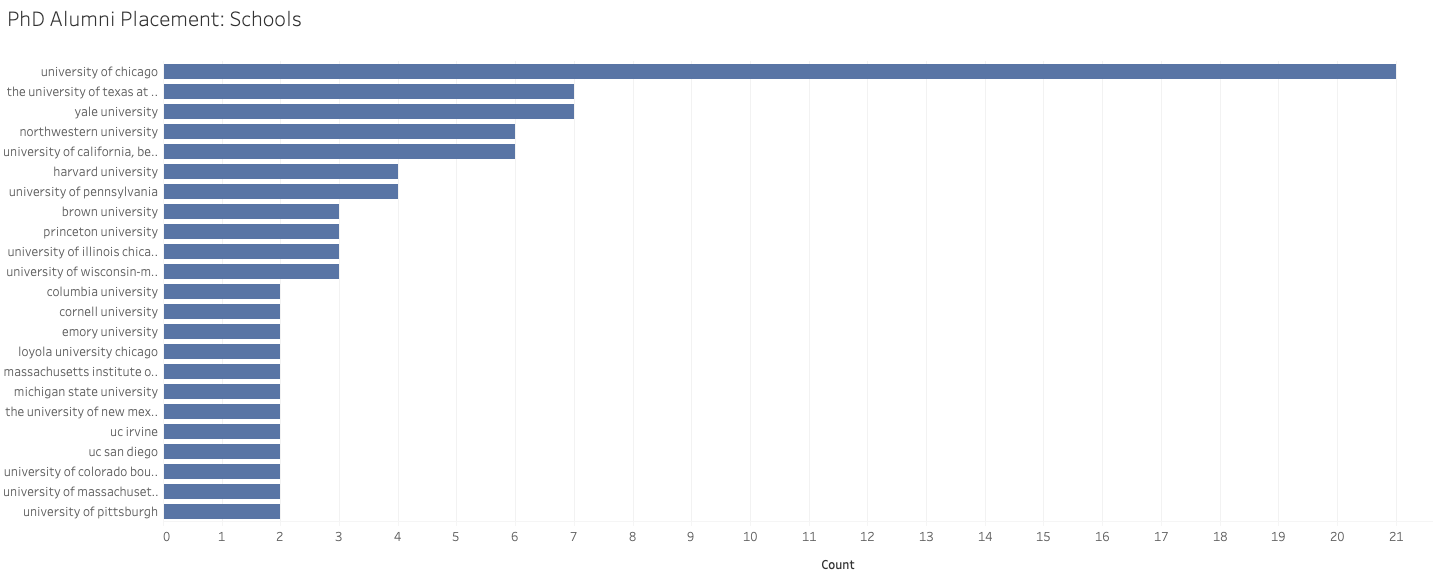

## MBA Placement Results

About 6\% of verified alumni went on to an MBA degree, and a majority went to Booth School of Business at University of Chicago

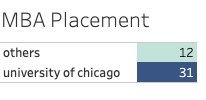

Source: Tableau

# Experience Analysis

In [108]:
df

,name,experience_type,school,degree,time,position,company,description,location
0,Carl Malmstrom,school,loyola university chicago school of law,j.d.,2004 - 2007,NaN,NaN,NaN,NaN
1,Carl Malmstrom,work,NaN,NaN,full-timefull-time,wolf haldenstein adler freeman & herz llp,14 yrs 7 mos,wolf haldenstein adler freeman & herz llpwolf ...,NaN
2,Carl Malmstrom,work,NaN,NaN,2 yrs 2 mos,law clerk,"city of chicago, department of law","city of chicago, department of lawcity of chic...",NaN
3,Carl Malmstrom,work,NaN,NaN,7 mos,intern,christine cegelis for congress,christine cegelis for congresschristine cegeli...,NaN
4,Carl Malmstrom,work,NaN,NaN,4 mos,intern,office of cook county commissioner larry suffr...,office of cook county commissioner larry suffr...,NaN
...,...,...,...,...,...,...,...,...,...
4250,Rivka Baker Keusch,work,NaN,NaN,7 mos,director of operations,new york state senator jessica ramos,•\tdeveloped tracking and reporting procedures...,NaN
4251,Rivka Baker Keusch,work,NaN,NaN,1 yr,campaign manager,jessica ramos for state senate,•\toutperformed democratic gubernatorial ticke...,NaN
4252,Rivka Baker Keusch,work,NaN,NaN,1 yr 9 mos,movement relaunch consultant,ifnotnow,"co-owned overall training, content, & facilita...",NaN
4253,Rivka Baker Keusch,work,NaN,NaN,sep 2021 - nov 2021,test & trace corps queens borough outreach dir...,NaN,the nyc test & trace corps announced today tha...,NaN


In [116]:
positions = {}
for index, row in df.iterrows():
    if row['experience_type'] == 'work':
        if(type(row['position']) == str and ('manage' in row['position'] or 'director' in row['position'] or 'president' in row['position'] or 'admin' in row['position'] or 'ceo' in row['position'] or 'found' in row['position'] or 'chief' in row['position'] or 'chair' in row['position'])):
            positions[row['name']] = 'Manager'
        if(type(row['position']) == str and 'consultant' in row['position']):
            positions[row['name']] = 'Consultant'
        if type(row['position']) == str and ('data scien' in row['position'] or 'data analy' in row['position'] or 'data engi' in row['position']):
            positions[row['name']] = 'Data Scientist/Analyst/Engineer'
        if type(row['position']) == str and ('software' in row['position'] or 'programmer' in row['position'] or 'developer' in row['position']):
            positions[row['name']] = 'Software Engineer'
        if type(row['position']) == str and ('research' in row['position'] or 'fellow' in row['position']):
            positions[row['name']] = 'Researcher'
        if type(row['position']) == str and ('teaching' in row['position'] or 'lectur' in row['position'] or 'professor' in row['position'] or 'faculty' in row['position']):
            positions[row['name']] = 'Teacher/Professor/TA'
        if type(row['position']) == str and ('law' in row['position'] or 'legal' in row['position'] or 'attorney' in row['position'] or 'judic' in row['position']):
            positions[row['name']] = 'Lawyer'

In [122]:
len(positions)

496

In [120]:
from collections import Counter
mydict = dict(Counter(positions.values()))

In [123]:
with open('positions.csv', 'w') as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in mydict.items():
        writer.writerow([key, value])

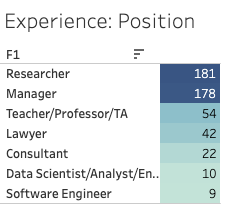

In [152]:
df['company'] = df["company"].astype(str)

In [163]:
industry = {}
for index, row in df.iterrows():
    if row['experience_type'] == 'work':
        if type(row['description']) == str and 'policy' in row['description']:
            industry[row['name']] = 'Policy'
        if type(row['description']) == str and 'consultant' in row['description']:
            industry[row['name']] = 'Consulting'
        if type(row['company']) == str and ('school' in row['company'] or 'educa' in row['company'] or 'college' in row['company'] or 'university' in row['company'] or 'institute' in row['company']):
            industry[row['name']] = 'Education'
        if type(row['company']) == str and type(row['position']) == str and ('state' in row['company'] or 'senate' in row['company'] or 'house of' in row['company'] or 'campaign' in row['position'] or 'department' in row['company'] or 'city' in row['company']):
            industry[row['name']] = 'Government'
        if type(row['company']) == str and ('pharma' in row['company'] or 'bio' in row['company'] or 'health' in row['company'] or 'hospital' in row['company']):
            industry[row['name']] =  'Healthcare'
        if type(row['position']) == str and type(row['description']) == str and ('finan' in row['position'] or 'banking' in row['description'] or 'business' in row['position'] or 'faculty' in row['position']):
            industry[row['name']] = 'Business/Finance'
        if type(row['position']) == str and ('law' in row['position'] or 'legal' in row['position'] or 'attorney' in row['position'] or 'judic' in row['position']):
            industry[row['name']] = 'Law'
        if type(row['description']) == str and type(row['company']) == str and 'nonprofit' in row['description'] and 'peace corp' in row['company']:
            industry[row['name']] = 'Nonprofit'
        if type(row['company']) == str and type(row['company']) == str and 'tech' in row['company']:
            industry[row['name']] = 'Technology'

In [165]:
len(industry)

434

In [161]:
from collections import Counter
industry = dict(Counter(industry.values()))
with open('industry.csv', 'w') as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in industry.items():
        writer.writerow([key, value])

## Position Type

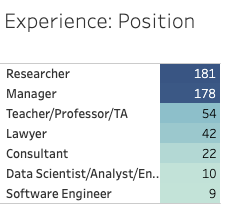

## Industry

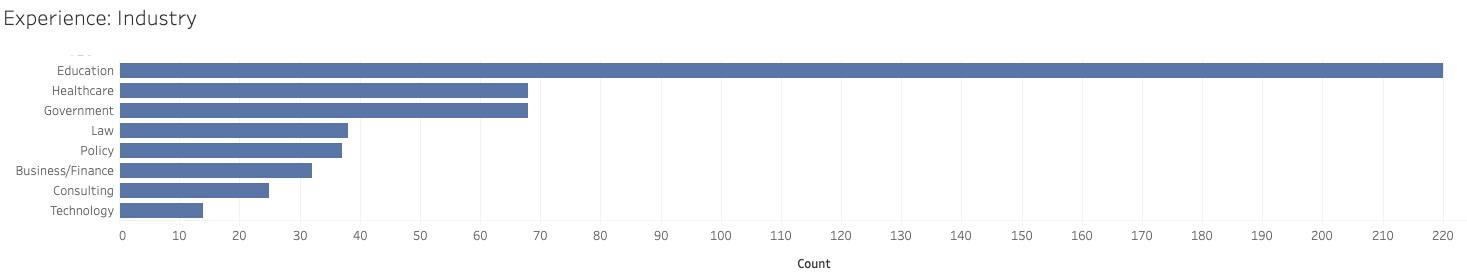

# Location Analysis

In [39]:
location = {}
for index,row in df.iterrows():
    if row['experience_type'] == 'work' and (type(row['location']) == str) and len(row['location']) < 30:
        location[row['name']] = row['location']
        if 'chicago' in location[row['name']] or 'evanston' in location[row['name']] or 'oak park' in location[row['name']]:
            location[row['name']] = 'greater chicago area'
        if 'new york city' in location[row['name']] or 'new york, ny' in location[row['name']] or 'bronx' in location[row['name']]:
            location[row['name']] = 'greater new york city area'
        if 'boston' in location[row['name']]:
            location[row['name']] = 'greater boston area'
        if 'washington d.c.' in location[row['name']] or 'washington dc' in location[row['name']] or 'washington, dc' in location[row['name']] or 'baltimore' in location[row['name']]:
            location[row['name']] = 'greater washington dc area'
        if 'san francisco' in location[row['name']] or 'palo alto' in location[row['name']] or 'berkeley' in location[row['name']]:
            location[row['name']] = 'bay area'
        if 'singapore' in location[row['name']]:
            location[row['name']] = 'singapore'
        if 'beijing' in location[row['name']]:
            location[row['name']] = 'beijing, china'
        continue
    elif row['experience_type'] == 'school' and row['name'] not in location and (type(row['location']) == str) :
        location[row['name']] = row['location']
        if 'chicago' in location[row['name']] or 'evanston' in location[row['name']] or 'oak park' in location[row['name']]:
            location[row['name']] = 'greater chicago area'
        if 'new york city' in location[row['name']] or 'new york, ny' in location[row['name']] or 'bronx' in location[row['name']]:
            location[row['name']] = 'greater new york city area'
        if 'boston' in location[row['name']]:
            location[row['name']] = 'greater boston area'
        if 'washington d.c.' in location[row['name']] or 'washington dc' in location[row['name']] or 'washington, dc' in location[row['name']] or 'baltimore' in location[row['name']]:
            location[row['name']] = 'greater washington dc area'
        if 'san francisco' in location[row['name']] or 'palo alto' in location[row['name']] or 'berkeley' in location[row['name']]:
            location[row['name']] = 'bay area'
        if 'singapore' in location[row['name']]:
            location[row['name']] = 'singapore'
        if 'beijing' in location[row['name']]:
            location[row['name']] = 'beijing, china'
        continue

In [24]:
len(location)

260

In [40]:
from collections import Counter
import csv
mydict = dict(Counter(location.values()))
with open('location.csv', 'w') as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in mydict.items():
        writer.writerow([key, value])

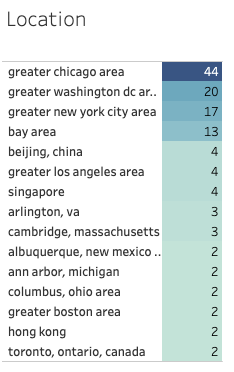